#### TASK 3 - Scene recognition with Bag of Visual Words

Group Number: 4


### 1 Data import and Preparation

Complete the class ***SceneDataset*** in ***dataset.py*** and load the training and test dataset. (images and class labels)

In [1]:
%load_ext autoreload
%autoreload 1
%aimport features, dataset, utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import numpy as np
import features
import dataset
import utils
import os

In [2]:
if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

#student_code start

# Training Dataset
train_class = dataset.SceneDataset('data/scene/train')
train_images, train_labels = train_class.get_data()
class_names = train_class.get_class_names()

# Test Dataset
test_class = dataset.SceneDataset('data/scene/test')
test_images, test_lables = test_class.get_data()

# ----------------------------------
# Show a sample for each class
# ----------------------------------
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
# for i in range(10):
#     sample_image = train_images[i*160]
#     sample_label = train_labels[i*160]
#     sample_class_name = class_names[sample_label]
#     plt.subplot(2,5,i+1)
#     plt.imshow(sample_image)
#     plt.title(f"{sample_class_name} ({sample_label})")

#student_code end

print('Imported test data: ',len(test_images))
print('Imported training data: ', len(train_images))
print(class_names)


Imported test data:  400
Imported training data:  1600
['bedroom', 'coast', 'forest', 'kitchen', 'livingroom', 'mountain', 'office', 'store', 'street', 'tallbuilding']


###  2 Build Vocabulary and Clusters

Extract SIFT features from the training data using ***features.extract_dsift(..)*** and then utilize the descriptors to generate visual words with ***KMeans(...).fit(...).cluster_centers_*** from ***sklearn.neighbors***. Set the sample size per image at about **100** and a step size around **5**. For cluster size, try a value around **50**. You can adapt the paramater to achieve better results. If clustering takes too long, have a look at the parameters **n_init** and **max_iter** of ***KMeans(...)***.

_***HINT:***_
***KMeans(..)*** expects the features to be a stacked 2D matrix instead of a list (np.vstack(...)).


In [3]:
#student code start

train_features = features.extract_dsift(train_images, stepsize=5, num_samples=100)
vocabulary = KMeans(n_clusters=50, n_init='auto').fit(np.vstack(train_features)).cluster_centers_

#student code end

DSIFT Extraction: 2.0367986999917775  seconds


###  3 Classification

Generat a histogram per image using the centroids. First extract the dense SIFT features of the training set again. This time use a smaller stepsize (eg. 1 or 2) and take all samples.

After, implement ***count_visual_words(..)*** in ***features.py*** to obtain a histogram per image. Build a kNN classifier with ***KNeighborsClassifier(..)*** and fit the the model with the histogram data of the training images and training labels. Set the neighbourhood size to **3**.


In [4]:
#student code start

train_features = features.extract_dsift(train_images, stepsize=2)
histograms = features.count_visual_words(train_features, vocabulary)

kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(histograms, train_labels)

# # -----------------------------------
# # Plot one histgram per class
# # -----------------------------------
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
# for i in range(10):
#     histogram = histograms[i*160]
#     sample_label = train_labels[i*160]
#     sample_class_name = class_names[sample_label]
#     x = [i for i in range(50)]
#     plt.subplot(2,5,i+1)
#     plt.bar(x,histogram)
#     plt.ylim(top = 450)
#     plt.title(f"{sample_class_name} ({sample_label})")

#student code end

DSIFT Extraction: 15.160699700005352  seconds
Counting visual words: 12.589423600002192  seconds


KNeighborsClassifier(n_neighbors=3)

### 4 Evaluation

Examine the accuracy of your model by extracting the dense SIFT points of the test set with the same stepsize as before, generate the histogams and predict the labels of the test set with the previously fitted classifier. Plot your results with ***utils.plot_confusion_matrix(..)***.

_***HINT:***_
Use the methods ***predict(..)*** and ***score(..)*** on the KNN classifier.


***Submission:*** Save the confusion matrix with the KNN score as **task3_accuracy_test_data.png** using ***utils.plot_confusion_matrix(..)***.



DSIFT Extraction: 5.325215100077912  seconds
Counting visual words: 3.956542299943976  seconds


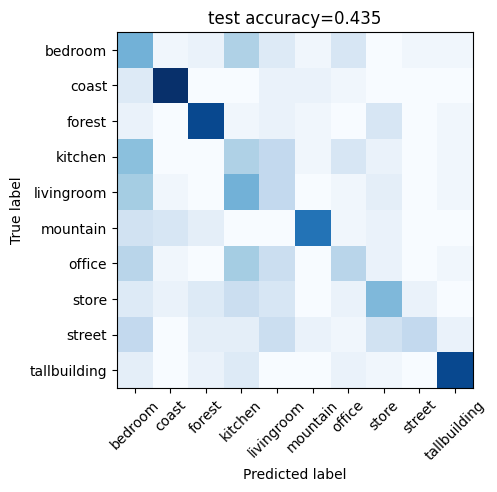

In [5]:
#student code start

test_features = features.extract_dsift(test_images, 2)
test_histograms = features.count_visual_words(test_features, vocabulary)

predictions = kNN.predict(test_histograms)
accuracy = kNN.score(test_histograms, test_class.labels)

utils.plot_confusion_matrix(test_class.labels, predictions, accuracy, class_names)

#student code end

***
#### Q1: Analyze the confusion matrix. Are there classes which can be more easily identified than others. What could be the reason? What classes perform worst, and explain your answer.


The classes 'coast,' 'forest,' 'mountain,' and 'tall building' are more easily identified by the classifier. This is probably due to the characteristic appearance and structure of the images within these classes, resulting in very specific histograms that are easily recognizable. Therefore, the boundaries in the feature space for these classes will be well distinguishable.
\
On the other hand, the system performs poorly on the classes 'kitchen,' 'living room,' 'office,' and 'bedroom.' These classes represent various types of rooms, sharing common features. The histograms are more similar, making the boundaries of the classes in the feature space less distinct. Hence, when the classifier has to assign an image to one of these classes, the nearest neighbors of its histogram probably belong to different classes, potentially leading to misclassification.


Take some own test images and investigate if they can be correctly classified with you trained model. For instance, take a photo of your own kitchen or living room and classify it. You should at least test one photo from three of the ten categories. Make sure the images are resized and cropped to 100x100.

***Submission:*** Save the confusion matrix with the model score as **task3_accuracy_custom_data.png** using ***utils.plot_confusion_matrix(..)***.

DSIFT Extraction: 0.07213029998820275  seconds
Counting visual words: 0.060371800092980266  seconds


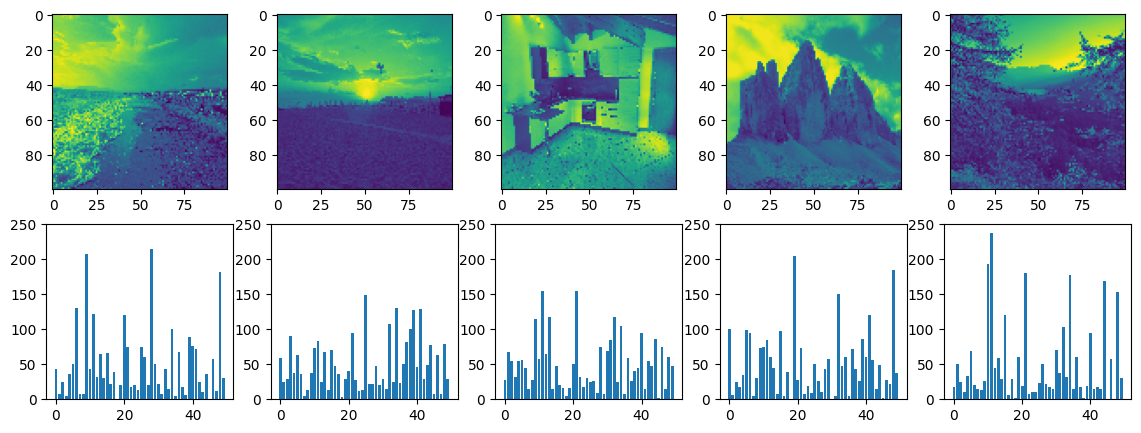

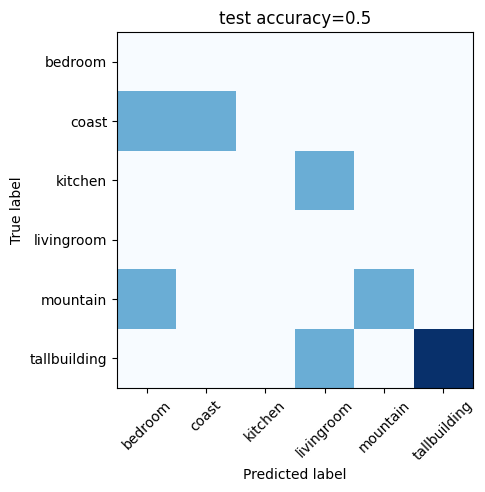

In [8]:
#student code start

import matplotlib.pyplot as plt
import cv2

path = 'data/scene/my_photos'
my_photos = []
true_labels = [1, 1, 3, 5, 5, 9, 9, 9]
for file in os.listdir(path):
    if file.endswith(('.jpg', '.png', 'jpeg')):
        img = cv2.imread(os.path.join(path, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (100, 100))
        img = img/255
        my_photos.append(img)

my_photos_features = features.extract_dsift(my_photos, 2)
my_photos_histograms = features.count_visual_words(my_photos_features, vocabulary)
predictions = kNN.predict(my_photos_histograms)

plt.figure(figsize=(14, 5))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(my_photos[i])
    histogram = histograms[i]
    x = [i for i in range(50)]
    plt.subplot(2,5,i+6)
    plt.bar(x,histogram)
    plt.ylim(top = 250)

accuracy = kNN.score(my_photos_histograms, true_labels)

utils.plot_confusion_matrix(true_labels, predictions, accuracy, class_names)

#student code end